In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day4.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig5-day0.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/ryct.2020200034.fig2.jpeg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/streptococcus-pneumoniae-pneumonia-temporal-evolution-1-day3.jpg
/kaggle/input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PN

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import random

from tensorflow import keras
from keras import layers
from keras import Model
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import InceptionV3

In [3]:

train_dir = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train'
test_dir = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test'

train_Pnuemonia_dir = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA'
train_Normal_dir = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL'


test_Pnuemonia_dir = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA'
test_Normal_dir = '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL'

dir_list = [train_Pnuemonia_dir,train_Normal_dir,test_Pnuemonia_dir,test_Normal_dir]

for d in dir_list:
    print(d, len(os.listdir(d)))

../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/PNEUMONIA 74
../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/train/NORMAL 74
../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA 20
../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/NORMAL 20


In [4]:

train_datagen = ImageDataGenerator(rescale=1.0/255.0,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=64,
                                                   class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

validation_generator = validation_datagen.flow_from_directory(test_dir,
                                                             target_size=(150,150),
                                                             batch_size=62,
                                                             class_mode='categorical')

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [5]:
# callback function

early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                 restore_best_weights=True)

In [6]:
# build the model

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    tf.keras.layers.Dense(2, activation='sigmoid')  
])

from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics = ['categorical_accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        3

In [7]:
history = model.fit(train_generator,
                   epochs=10,
                   verbose=1,
                   validation_data=validation_generator,
                   callbacks=early_stopping_cb)

Epoch 1/10
3/3 [==============================] - 13s 3s/step - loss: 1.3501 - categorical_accuracy: 0.4204 - val_loss: 0.6923 - val_categorical_accuracy: 0.5000
Epoch 2/10
3/3 [==============================] - 7s 2s/step - loss: 0.6908 - categorical_accuracy: 0.5108 - val_loss: 0.6873 - val_categorical_accuracy: 0.6250
Epoch 3/10
3/3 [==============================] - 7s 2s/step - loss: 0.6946 - categorical_accuracy: 0.5055 - val_loss: 0.6883 - val_categorical_accuracy: 0.5000
Epoch 4/10
3/3 [==============================] - 7s 2s/step - loss: 0.6845 - categorical_accuracy: 0.5281 - val_loss: 0.6592 - val_categorical_accuracy: 0.5000
Epoch 5/10
3/3 [==============================] - 7s 3s/step - loss: 0.6718 - categorical_accuracy: 0.5579 - val_loss: 0.6622 - val_categorical_accuracy: 0.5750
Epoch 6/10
3/3 [==============================] - 6s 2s/step - loss: 0.7019 - categorical_accuracy: 0.5366 - val_loss: 0.5907 - val_categorical_accuracy: 0.5000
Epoch 7/10
3/3 [=================

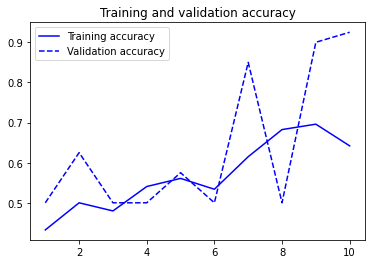

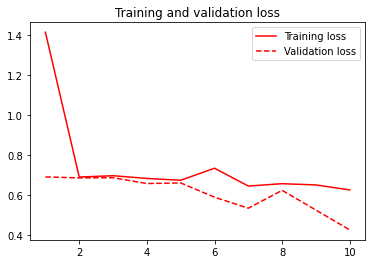

In [8]:
# plot accuracy and loss

import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# accuracy

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'b--', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

# loss

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'r--', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [9]:
validation_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [10]:
class_dict = {0:'Normal',
              1:'Pneumonia'}

In [12]:
import cv2

prediction class:  Pneumonia


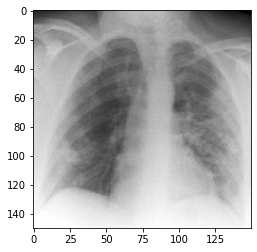

In [13]:
file_path =  '../input/covid19-xray-dataset-train-test-sets/xray_dataset_covid19/test/PNEUMONIA/SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg'
test_image = cv2.imread(file_path)
test_image = cv2.resize(test_image, (150,150),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print('prediction class: ',pred_class)



In [ ]:
import cv2